<a href="https://colab.research.google.com/github/shamitha2310/python-mini-project/blob/main/House_size_vs_House_Price_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

In [2]:
#Introduction to ML
#used libraries - random, numpy, Pandas

In [ ]:
# Terms in machine learning
#1. Collection:Data used for training,validating and testing the machine learning model
#2. Feature(x): Independent variable input variable - used to predict the target variable
#3. Target (y): Dependent variable - output - we want to predict - example: predicting numpy of bedrooms
#4. Training data: subsets of dataset used to train the model
#5. Testing data: subsets of dataset used to validate the trained model
#6. Model: Mathematical representation of relationship between feature and target
#7. Supervised Learning(SL): Tarning the data based on labelled data/model Learns from know/labeled data
#8. Regression: Method to predict continuous values from a model-supervised learning
#9. Overfitting: when a model Learns from training data too well, includes noise-performs poorly new data
#10. Underfitting: Model is too simpler and does not capture patterns on data
#1. Supervised Learning:
#Model learns from Labeled data-i/o pairs
# example: Linear regression,decision trees,random forest,SVM
# Best use case so far: House price prediction,based on previous data

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
#step 1:generate a random dataset
np.random.seed(42)#Used to set same sequence of values for the random package
numSamples = 100


#create numSamples number of samples from (800, 5000)
Size = np.random.randint(800,5000, numSamples)

Bedrooms = np.random.randint(1,6, numSamples)
Washrooms = np.random.randint(1,8, numSamples)
LocalityScore = np.random.randint(1,10, numSamples)

# Generate House prices with randomness
housePrice = (Size * 3000) + (Bedrooms * 50000) + (Washrooms * 30000) +(localityScore *70000) +np.random.randint(-50000, 50000, numSamples)

#create a dataframe
df =pd.DataFrame(
    {
       'Size' : Size,
       'Bedrooms' : Bedrooms,
       'Washrooms' : Washrooms,
       'LocalityScore' : LocalityScore,
       'Price' : housePrice,
}
)

In [6]:
df

,Size,Bedrooms,Washrooms,LocalityScore,Price
0,1660,5,2,9,5964758
1,4572,4,7,5,14517747
2,3892,5,7,8,12708752
3,1266,5,6,1,4304573
4,4244,3,2,5,13301101
...,...,...,...,...,...
95,1006,1,6,5,3591286
96,2284,3,5,1,7240450
97,1663,4,6,4,5620352
98,3590,1,3,5,11265069


In [7]:
# step 2 : Train a ML model-Liner regression
# Package (installation) requirements :
# pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
X = df[['Size','Bedrooms','Washrooms','LocalityScore']]
Y = df['Price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,
random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
# Step 3 : Evaluate the Model
# Package Requirements
# sklearn.metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean Absolute Error : {MAE}')
print(f'Mean Squared Error : {MSE}')
print(f'Root Mean Squared Error :   {RMSE}')

Mean Absolute Error : 25385.345481365337
Mean Squared Error : 796791448.4323988
Root Mean Squared Error :   28227.494547557686


In [11]:
# Step 4 : Make prediction
newHouse = np.array([[4000,4,6,10]])
predictedPrice = model.predict(newHouse)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
print(f'The predicted prize of new house is {predictedPrice[0]}')

The predicted prize of new house is 13069094.887436867


<ipython-input-13-dc212a5233f9>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


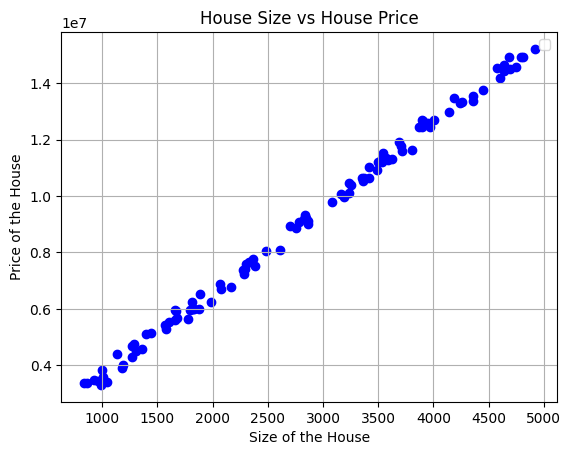

In [13]:
plt.scatter(df['Size'],df['Price'], color = 'blue')
plt.xlabel('Size of the House')
plt.ylabel('Price of the House')
plt.legend()
plt.grid(True)
plt.title('House Size vs House Price')
plt.show()

In [14]:
Xsorted=np.sort(X,axis=0)
y_pred=model.predict(Xsorted)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-15-e209e21d419f>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


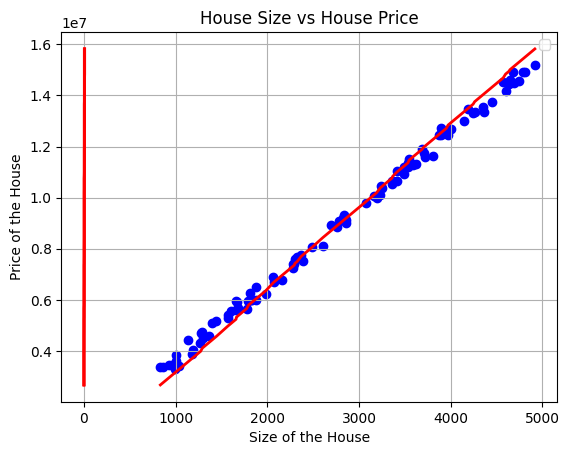

In [15]:
plt.scatter(df['Size'],df['Price'],color='blue')
plt.plot(Xsorted,y_pred,color='red',linewidth=2)
plt.xlabel('Size of the House')
plt.ylabel('Price of the House')
plt.legend()
plt.grid(True)
plt.title('House Size vs House Price')
plt.show()